# PROBLEM STATEMENT


- In this project, we will build a simple machine learning model to convert from celsius to fahrenheit. 
- The equation is as follows: **T(°F) = T(°C) × 9/5 + 32**
- For Example, let's convert 0°C celsius temperature to Fahrenheit:  **(0°C × 9/5) + 32 = 32°F**



<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/7/70/Thermometer_CF.svg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Convert Celsius to Fahrenheit [Image Source: https://commons.wikimedia.org/wiki/File:Thermometer_CF.svg]
  </td></tr>
</table>


# STEP #0: IMPORT LIBRARIES

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# STEP #1: IMPORT DATASETS

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# You have to include the full link to the csv file containing your dataset
Temperature_df = pd.read_csv('/content/drive/My Drive/Celsius+to+Fahrenheit.csv')
Temperature_df.reset_index(drop=True, inplace=True)



In [5]:
Temperature_df

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0
5,-9,15.8
6,-8,17.6
7,-7,19.4
8,-6,21.2
9,-5,23.0


In [6]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [7]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [8]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [9]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


# STEP #2: VISUALIZE DATASET

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


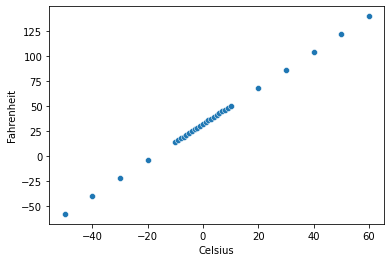

In [10]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

# STEP #3: CREATE TESTING AND TRAINING DATASET

In [11]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']


# STEP#4: BUILD AND TRAIN THE MODEL

In [12]:
X_train.shape

(30,)

In [13]:
y_train.shape

(30,)

In [20]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

In [23]:
epochs_hist = model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1472.5461
Epoch 2/500
1/1 [==============================] - 0s 2ms/step - loss: 954.8541
Epoch 3/500
1/1 [==============================] - 0s 2ms/step - loss: 1130.1046
Epoch 4/500
1/1 [==============================] - 0s 2ms/step - loss: 1088.9332
Epoch 5/500
1/1 [==============================] - 0s 1ms/step - loss: 870.7802
Epoch 6/500
1/1 [==============================] - 0s 2ms/step - loss: 725.9837
Epoch 7/500
1/1 [==============================] - 0s 2ms/step - loss: 722.8467
Epoch 8/500
1/1 [==============================] - 0s 2ms/step - loss: 750.6978
Epoch 9/500
1/1 [==============================] - 0s 1ms/step - loss: 701.1194
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 590.2523
Epoch 11/500
1/1 [==============================] - 0s 2ms/step - loss: 492.9071
Epoch 12/500
1/1 [==============================] - 0s 1ms/step - loss: 454.4086
Epoch 13/500
1/1 [================

# STEP#5: EVALUATING THE MODEL 

In [24]:
epochs_hist.history.keys()

dict_keys(['loss'])

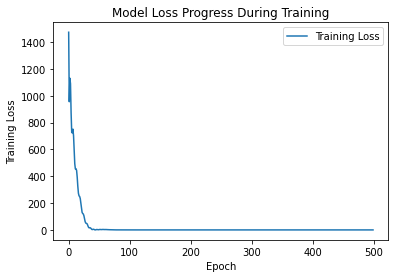

In [25]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [26]:
model.get_weights()

[array([[1.8]], dtype=float32), array([32.], dtype=float32)]

In [27]:
# Use the trained model to perform predictions

Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)


Temperature in degF Using Trained ANN = [[32.]]


In [28]:
# Let's confirm this Using the equation: 
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)


Temperature in degF Using Equation = 32.0
